In [1]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import spacy
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

In [2]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
path='/workspace/unitartucs-thesis-tokenMerge/coding/LSTMWeight/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 Curl skipCCONJ R1   
 1 RandMerge 256dim min2max2
 2 HPC Curl MergeADJ   
 3 HPC Curl RandMerge  
 4 HPC Curl BaseCase   
 5 Curl MergePROPN R1  
 6 Curl RandMerge min2Max3
 7 Curl RandMerge R1   
 8 Curl BaseCase R1    


In [3]:
curdataList = glob.glob(f'{path}{run[8]}/val_curldata_*.plk')
divdataList = glob.glob(f'{path}{run[8]}/val_divdata_*.plk')
curldata={}
divdata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        tmp=pickle.load(f)
        i=list(tmp.keys())[0]
        curldata[i]=tmp[i]
for file in divdataList:
    with open(f'{file}','rb') as f:
        tmp=pickle.load(f)
        i=list(tmp.keys())[0]
        divdata[i]=tmp[i]
print(curldata.keys())

dict_keys([627, 626, 625, 624, 623, 622, 621, 620, 619, 618, 617, 616, 615, 614, 613, 612, 611, 610, 609, 608, 607, 606, 605, 604, 603, 602, 601, 600, 599, 598, 597, 596, 595, 594, 593, 592, 591, 590, 589, 588, 587, 586, 585, 584, 583, 582, 581, 580, 579, 578, 577, 576, 575, 574, 573, 572, 571, 570, 569, 568, 567, 566, 565, 564, 563, 562, 561, 560, 559, 558, 557, 556, 555, 554, 553, 552, 551, 550, 549, 548, 547, 546, 545, 544, 543, 542, 541, 540, 539, 538, 537, 536, 535, 534, 533, 532, 531, 530, 529, 528, 527, 526, 525, 524, 523, 522, 521, 520, 519, 518, 517, 516, 515, 514, 513, 512, 511, 510, 509, 508, 507, 506, 505, 504, 503, 502, 501, 500, 499, 498, 497, 496, 495, 494, 493, 492, 491, 490, 489, 488, 487, 486, 485, 484, 483, 482, 481, 480, 479, 478, 477, 476, 475, 474, 473, 472, 471, 470, 469, 468, 467, 466, 465, 464, 463, 462, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 451, 450, 449, 448, 447, 446, 445, 444, 443, 442, 441, 440, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430,

In [4]:
epoch=531
keys=list(curldata[epoch]['forward'].keys())
print(keys)

[0, 25, 50, 75, 100, 125, 150]


In [5]:
samplesize=min(len(negidx),len(posidx))
#samplesize=200
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
epochN_in=curldata[epoch][direction][0][nsmpidx,:25,:]
epochN_curl=curldata[epoch][direction][0][nsmpidx,25:,:]
epochP_in=curldata[epoch][direction][0][psmpidx,:25,:]
epochP_curl=curldata[epoch][direction][0][psmpidx,25:,:]

epochN_div=divdata[epoch][direction][0][nsmpidx,25:,:]
epochP_div=divdata[epoch][direction][0][psmpidx,25:,:]

for k in range(1,len(keys)):
    epochN_in = np.hstack((epochN_in,curldata[epoch][direction][keys[k]][nsmpidx,:25,:]))
    epochN_curl = np.hstack((epochN_curl,curldata[epoch][direction][keys[k]][nsmpidx,25:,:]))
    epochP_in = np.hstack((epochP_in,curldata[epoch][direction][keys[k]][psmpidx,:25,:]))
    epochP_curl = np.hstack((epochP_curl,curldata[epoch][direction][keys[k]][psmpidx,25:,:]))
    epochN_div = np.hstack((epochN_div,divdata[epoch][direction][keys[k]][nsmpidx,25:,:]))
    epochP_div = np.hstack((epochP_div,divdata[epoch][direction][keys[k]][psmpidx,25:,:]))
    

491


In [ ]:
length=175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
fig = plt.figure(dpi=600)
curlax = fig.add_subplot(projection='3d')
ln=curlax.quiver(epochN_in[50:100,0:1,0], epochN_in[50:100,0:1,1], epochN_in[50:100,0:1,2],
              epochN_curl[50:100,0:1,0] , epochN_curl[50:100,0:1,1], epochN_curl[50:100,0:1,2] ,
              length=0.3,color=nco[0], normalize=True)
def init():
    return ln
def update(i):
    global nco
    i=int(i)
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    ln=curlax.quiver(epochN_in[50:100,i:i+1,0], epochN_in[50:100,i:i+1,1], epochN_in[50:100,i:i+1,2],
              epochN_curl[50:100,i:i+1,0] , epochN_curl[50:100,i:i+1,1], epochN_curl[50:100,i:i+1,2] ,
              length=0.1, normalize=True,color=cmap)
    return ln

ani = FuncAnimation(fig, update, frames=length, init_func=init, blit=True, interval=100)
HTML(ani.to_html5_video())

/tmp/ipykernel_22322/2238927358.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


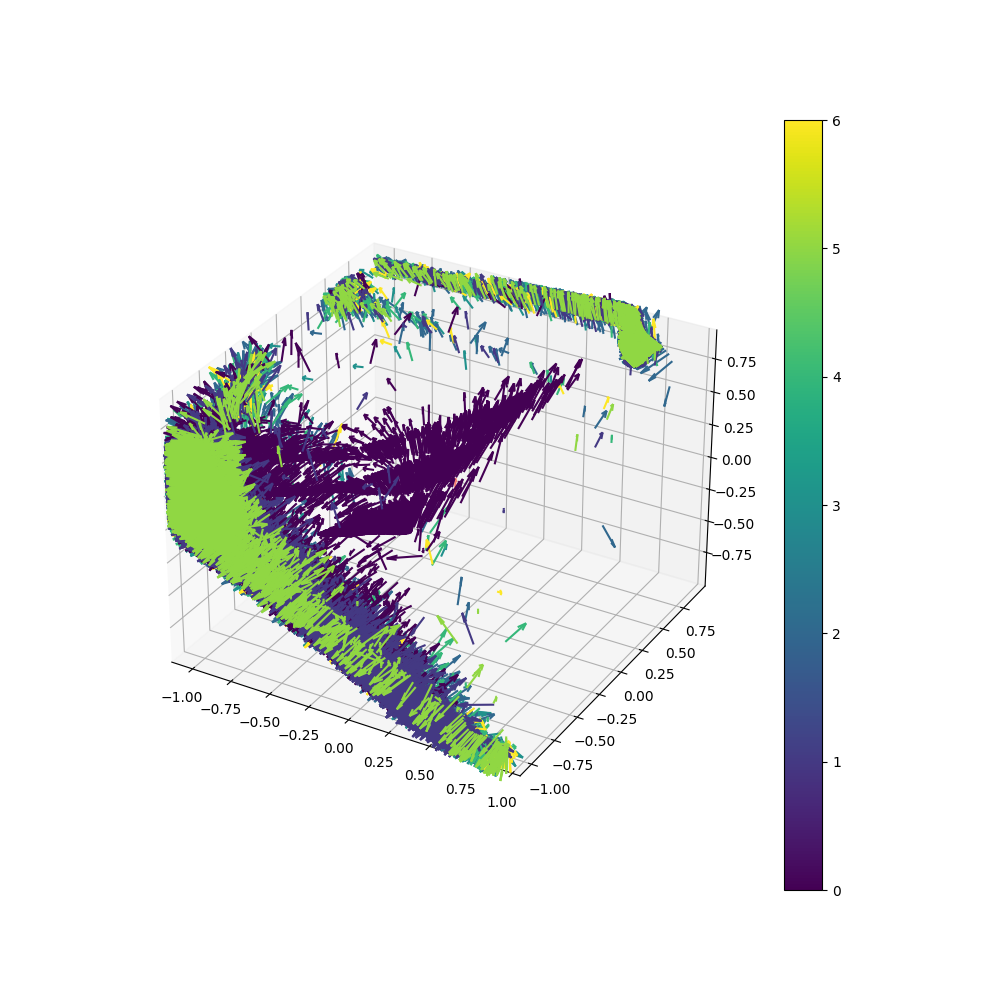

In [8]:
start,stop=0,175
negcolormap = cm.viridis
colors=np.arange(175//25)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
curlax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop,25):
    #p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    #p=np.where(p>99,99,p)
    #cmap=nco[p.astype(int)]
    curlax.quiver(epochN_in[:,i:i+25,0], epochN_in[:,i:i+25,1], epochN_in[:,i:i+25,2],
                  epochN_curl[:,i:i+25,0] , epochN_curl[:,i:i+25,1], epochN_curl[:,i:i+25,2] ,
                  length=0.2,colors=nco[i//25],normalize=True)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
plt.colorbar(sm)
plt.show()

/tmp/ipykernel_20796/2688431218.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


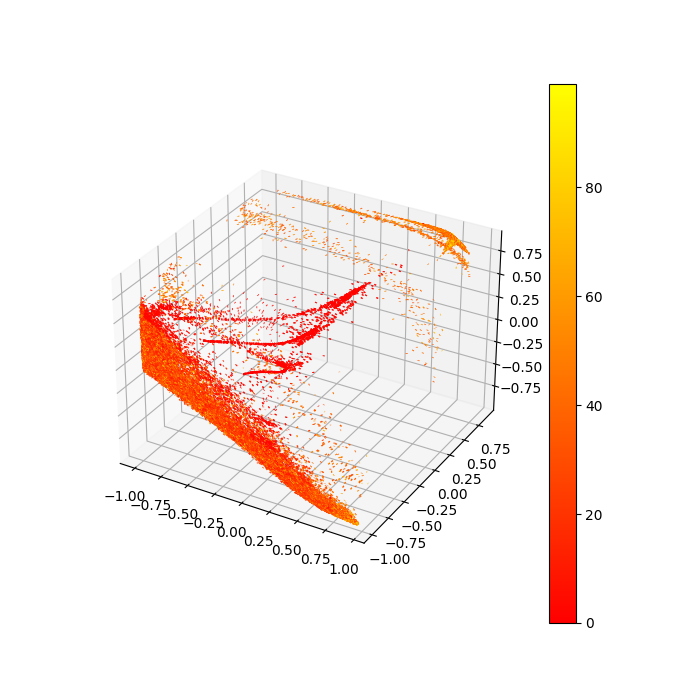

In [24]:
start,stop=0,175
poscolormap = cm.autumn
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
pco=poscolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(7,7))
curlax=curlfig.add_subplot(projection='3d')
for i in range(start,stop):
    p=np.ceil(i/test1.loc[psmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=pco[p.astype(int)]
    curlax.quiver(epochP_in[:,i:i+1,0], epochP_in[:,i:i+1,1], epochP_in[:,i:i+1,2],
                  epochP_curl[:,i:i+1,0] , epochP_curl[:,i:i+1,1], epochP_curl[:,i:i+1,2] ,
                 length=0.01, normalize=True,color=cmap)
sm = plt.cm.ScalarMappable(cmap=cm.autumn, norm=norm)
plt.colorbar(sm)
plt.show()

/tmp/ipykernel_22322/1752737330.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


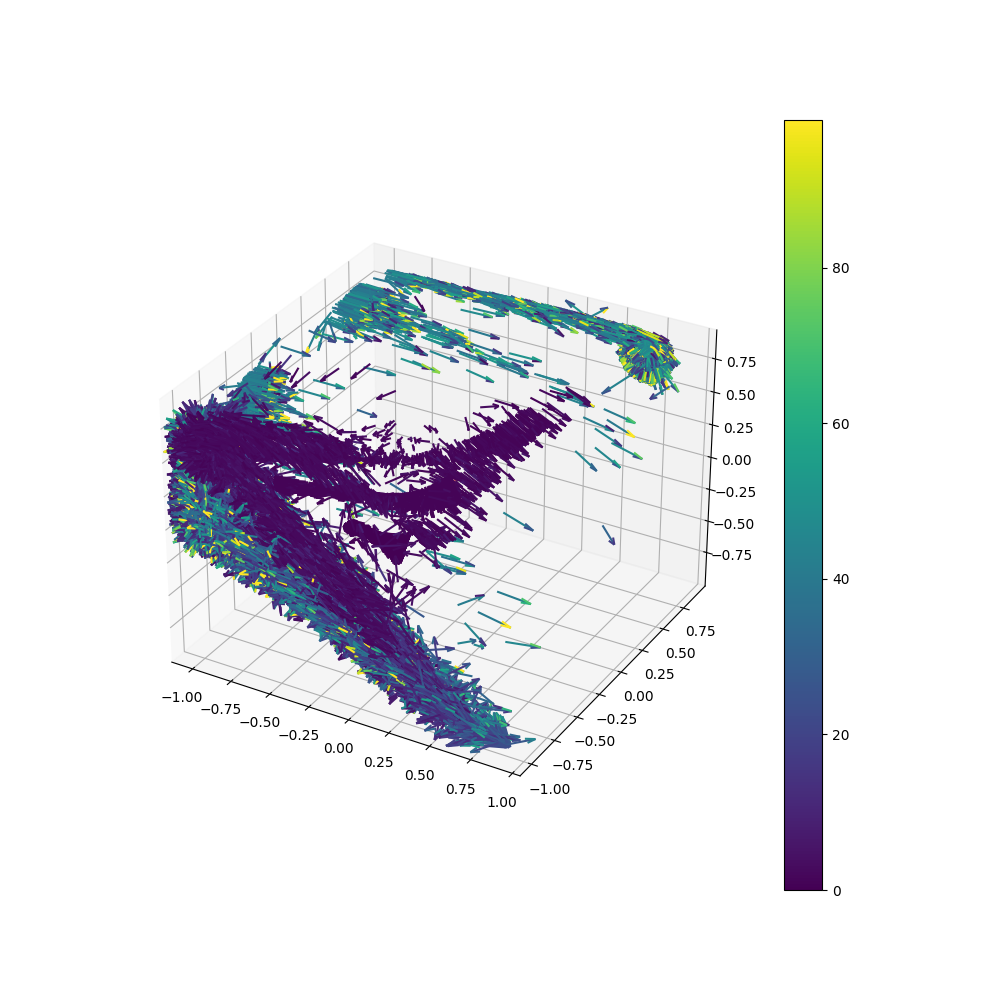

In [9]:
start,stop=0,175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
plt.close('all')
divfig=plt.figure(figsize=(10,10))
divax=divfig.add_subplot(projection='3d')
divax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop):
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    divax.quiver(epochN_in[:,i:i+1,0], epochN_in[:,i:i+1,1], epochN_in[:,i:i+1,2],
                  epochN_div[:,i:i+1,0] , epochN_div[:,i:i+1,1], epochN_div[:,i:i+1,2] ,
                  length=0.2,colors=cmap,normalize=True)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
plt.colorbar(sm)
plt.show()